## Parte III – Validação Holdout em Problema Não-Linearmente Separável
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 05/09/2020

Esta tarefa consistiu em aplicar o percetron de Rosenblatt em uma tarefa Não-linearmente Separável, O primeiro passo foi implementar o percetron em Forma de classe para que a sua ultização posterior tivesse mais clareza. No primeiro momento foi plotado em um  Scatter plot o conjunto de dados, para se comprovar que se tratava de um problema não-linear.

## Importando as bibliotecas usadas na tarefa

In [31]:
import random
import itertools
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor


## Lendo os dados do arquivo dataHoldout.txt

Ao realizar a leitura é todos os exemplos das entradas estão em uma mesma dimensão por isso, foi realizado um reshape no conjunto de dados.

In [3]:
dataset = np.fromfile('../dados/dataHoldout.txt')
number_instances = dataset.shape[0] // 3 ## 3 é quantidade de colunas
dataset = dataset.reshape(number_instances, 3)
dataset

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

## Plotando o conjunto de dados

Imprimindo o cojunto de dados para identificar como os dados estão distribuidos, com a impressão fica claro que os dados são estão dispostos como um problema linear.

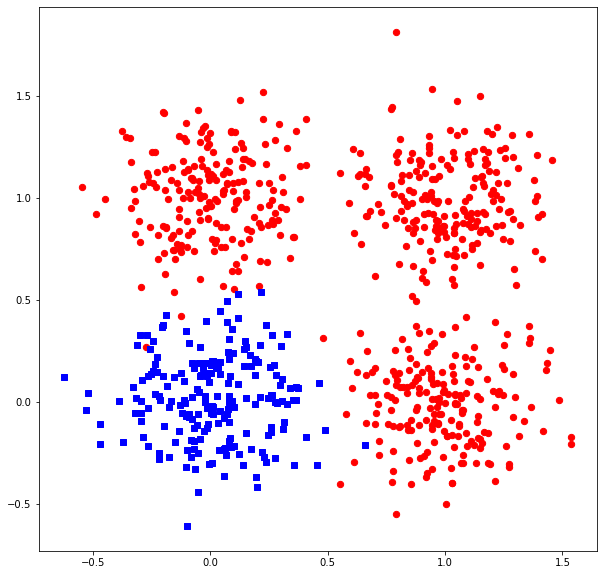

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
x = dataset[:,0][dataset[:, 2] == 0.0] # seleciona colunas 0 e targe 0
y = dataset[:,1][dataset[:, 2] == 0.0] # seleciona colunas 1 e targe 0
ax.scatter(x, y, c='r', s=40, marker='o', label='0')
x = dataset[:,0][dataset[:, 2] == 1.0] # seleciona colunas 0 e targe 1
y = dataset[:,1][dataset[:, 2] == 1.0] # seleciona colunas 1 e targe 1
ax.scatter(x, y, c='b', s=40, marker='s', label='0')
plt.show()

Tentando usar uma curva para limitar os dois grupos dentro do conjuto de dados.

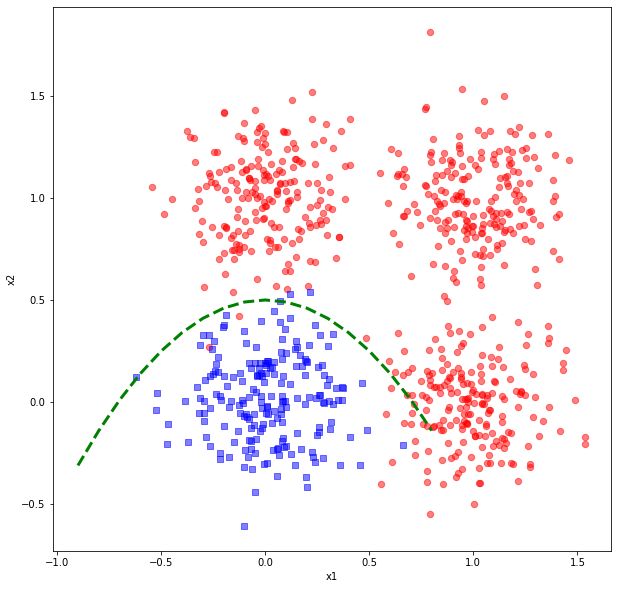

In [5]:
def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    #return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))
    return -x_1**2 + x_1/2000 + 0.5

# Main scatter plot and plot annotation
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dataset[:,0][dataset[:,2] == 0.0], dataset[:,1][dataset[:,2] == 0.0], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(dataset[:,0][dataset[:,2] == 1.0], dataset[:,1][dataset[:,2] == 1.0], marker='s', color='blue', s=40, alpha=0.5)
#plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')

# Adding decision boundary to plot
x_1 = np.arange(-0.9, 0.9, 0.1) #np.array([-.7, .0, .5, .6, .7, .8, 1])
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'g--', lw=3)
plt.show()

In [6]:
#TODO: criar uma função de fronteira que delimite a os grupos

## Separando os dados em treino e teste

Criando funções para dividir o dataset em treino e teste e plotar esses dados para visualizar como eles estão dispostos

```
@method: criate data train and test

@parameters: dataset, percent

@return: x train and test and y train and test
```

number_instances_train=560
number_instances_test=240


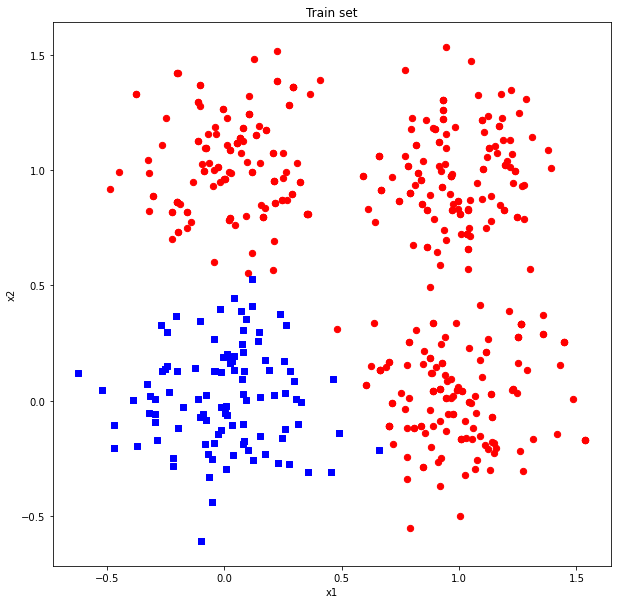

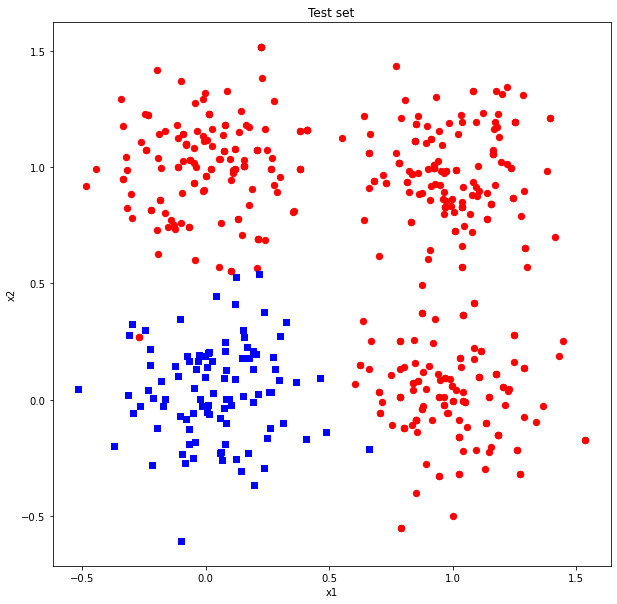

In [7]:
def plot_set(d, title=''):
    f, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40)
    ax.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40)
    plt.title(title)
    plt.ylabel('x2')
    plt.xlabel('x1')

def train_test_split(dataset, percent_train=.7):
    number_instances_train = ceil(len(dataset)*percent_train)
    number_instances_test = len(dataset) - number_instances_train
    print(f'number_instances_train={number_instances_train}')
    print(f'number_instances_test={number_instances_test}')
    index = np.random.randint(low=0, high=len(dataset), size=number_instances_train)
    plot_set(dataset[index], 'Train set')
    plot_set(dataset[~index], 'Test set')
    x_train = dataset[index][:,[0,1]]
    y_train = dataset[index][:, 2]
    x_test = dataset[~index][:, [0,1]]
    y_test = dataset[~index][:, 2]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(dataset, .7)

## Importando o perceptron de Rosenblatt

*** Esta classe foi implemanta por mim e está no arquivo '../src/Perceptron.py'

In [8]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Treinando um percetron com o conjuntos de treinamento

In [9]:
perceptron = Perceptron(no_of_inputs=2)
perceptron.fit(x_train, y_train)


	Época: 1
Pesos: [0.66153496 0.96271637 0.14321262]
Quantidade de Ajustes: 0

	Época: 2
Pesos: [ 0.06153496  0.05347365 -0.07378158]
Quantidade de Ajustes: 216

	Época: 3
Pesos: [-0.02846504 -0.04878243 -0.04199556]
Quantidade de Ajustes: 259

	Época: 4
Pesos: [-0.02846504 -0.05131105 -0.04631268]
Quantidade de Ajustes: 283

	Época: 5
Pesos: [-0.02846504 -0.05283651 -0.05215023]
Quantidade de Ajustes: 305

	Época: 6
Pesos: [-0.02846504 -0.06389024 -0.04514899]
Quantidade de Ajustes: 327

	Época: 7
Pesos: [-0.02846504 -0.05847125 -0.05449536]
Quantidade de Ajustes: 347

	Época: 8
Pesos: [-0.02846504 -0.0586539  -0.05712686]
Quantidade de Ajustes: 367

	Época: 9
Pesos: [-0.02846504 -0.06452881 -0.05417606]
Quantidade de Ajustes: 385

	Época: 10
Pesos: [-0.02846504 -0.06280213 -0.05637621]
Quantidade de Ajustes: 403

	Época: 11
Pesos: [-0.02846504 -0.06707863 -0.05577698]
Quantidade de Ajustes: 425

	Época: 12
Pesos: [-0.02846504 -0.06661331 -0.05597365]
Quantidade de Ajustes: 443

	Époc

## Fazendo a predição do conjunto de teste

In [10]:
y_pred = perceptron.predict(x_test)
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [30]:
results = np.array([y_test, y_pred])
true_positive = len(results[0][(results[0] == 1.0) & (results[1] == 1.0)])
true_negative = len(results[0][(results[0] == 0.0) & (results[1] == 0.0)])
false_positive = len(results[0][(results[0] == 0.0) & (results[1] == 1.0)])
false_negative = len(results[0][(results[0] == 1.0) & (results[1] == 0.0)])


In [40]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    #accuracy = np.trace(cm) / float(np.sum(cm))
    #misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [41]:
plot_confusion_matrix(cm = np.array([[true_posite, false_positive],
                                    [false_negative, true_negative]]),
                          target_names=['0', '1'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

TypeError: Image data of dtype object cannot be converted to float